In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction import
from sklearn.ensemble import RandomForestClassifier

In [137]:
df =pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", header=None)

In [138]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [139]:
print(df[8])

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: 8, Length: 768, dtype: int64


In [140]:
X=df[[0,1,2,3,4,5,6,7]].values
y=df[8].values
X=(X-X.mean())/X.std()

In [142]:
df[8] = df[8].map({0:"Healthy", 1:"Sick" })

In [143]:
print(df[8])

0         Sick
1      Healthy
2         Sick
3      Healthy
4         Sick
        ...   
763    Healthy
764    Healthy
765    Healthy
766       Sick
767    Healthy
Name: 8, Length: 768, dtype: object


In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [146]:
print(y_train.shape, type(y_train))


(614,) <class 'numpy.ndarray'>


In [147]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [148]:
y_pred = model.predict(X_test)
print(f' is {y_pred}')

 is [0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [149]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, zero_division=1)
print(f"Classification Metrics:\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}")

Classification Metrics:
Accuracy: 0.78
Precision: 0.72
Recall: 0.62


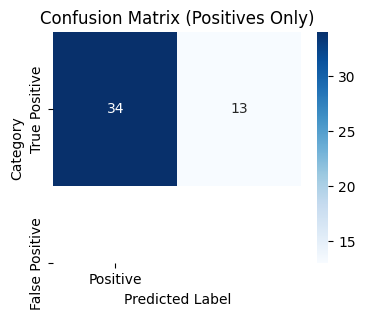

In [151]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract only positives (TP and FP)
cm_positives = np.array([[cm[1, 1], cm[0, 1]]])  # TP and FP

# Create a heatmap showing only positives
plt.figure(figsize=(4, 3))
sns.heatmap(cm_positives, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive'], yticklabels=['True Positive', 'False Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('Category')
plt.title('Confusion Matrix (Positives Only)')
plt.show()


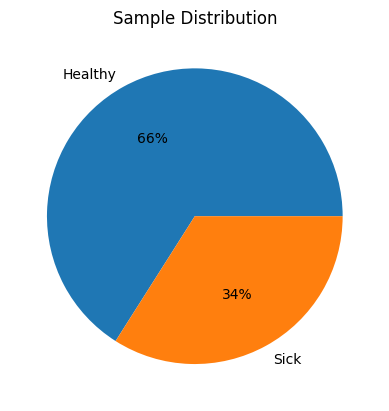

In [166]:
import matplotlib.pyplot as plt
sample_df = df.sample(n=100, random_state=42)
sample_counts = sample_df[8].value_counts()
plt.pie(sample_counts, labels=sample_counts.index, autopct='%1.f%%')
plt.title("Sample Distribution")
plt.show()
